In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [13]:
# HODP colors
monochrome_colors = ['#251616', '#760000', '#C63F3F', '#E28073', '#F1D3CF']
primary_colors = ['#C63F3F', '#F4B436', '#83BFCC', '#455574', '#E2DDDB']

# HODP template
theme_hodp = go.layout.Template(
    layout=go.Layout(
        title = {'font':{'size':24, 'family':"Helvetica", 'color':monochrome_colors[0]}, 'pad':{'t':100, 'r':0, 'b':0, 'l':0}},
        font = {'size':18, 'family':'Helvetica', 'color':'#717171'},
        xaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'showline': True,
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'automargin': True
                },
        yaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'showline': True,
                'automargin': True
                },
        legend = {'bgcolor':'rgba(0,0,0,0)', 
                'title':{'font':{'size':18, 'family':"Helvetica", 'color':monochrome_colors[0]}}, 
                'font':{'size':14, 'family':"Helvetica"}, 
                'yanchor':'bottom'
                },
        colorscale = {'diverging':monochrome_colors},
        coloraxis = {'autocolorscale':True, 
                'cauto':True, 
                'colorbar':{'tickfont':{'size':14,'family':'Helvetica'}, 'title':{'font':{'size':18, 'family':'Helvetica'}}},
                }
    )
)

In [3]:
vdistances = pd.read_csv("geocoded_businesses.csv")
vdistances.head(5)

,Unnamed: 0,Name,Latitude,Longitude,Address,Storefront Sales Status,Sales Options,Grocery Sales,Phone,Website,Facebook,Twitter,Instagram,LastModified
0,0,1369 Coffee House,42.390604,-71.121712,NaN,Open,"Delivery, Take Out",yes,757 Massachusetts Ave,NaN,https://www.facebook.com/1369Coffeehouse/,https://twitter.com/1369coffeehouse?ref_src=tw...,https://www.instagram.com/1369coffeehouse/?hl=en,2020-06-16T17:08:30Z
1,1,1369 Coffee House,42.373793,-71.100367,NaN,Open,"Delivery, Take Out, Outdoor Dining",NaN,1369 Cambridge Street,NaN,https://www.facebook.com/1369Coffeehouse/,https://twitter.com/1369coffeehouse,https://www.instagram.com/1369coffeehouse/?hl=en,2020-07-10T15:24:36Z
2,2,2 4-1 Optical,42.390604,-71.121712,NaN,Open,NaN,NaN,1128 Massachusetts Ave,NaN,https://www.facebook.com/241optical/,NaN,NaN,2020-06-16T17:09:04Z
3,3,5th Street Laundromat,42.369638,-71.083565,NaN,Open,NaN,NaN,58 5th Street,NaN,NaN,NaN,NaN,2020-03-22T12:45:32Z
4,5,730 Tavern,42.366016,-71.105142,NaN,Open,"Delivery, Take Out, Indoor Dining",NaN,730 Massachusetts Ave,NaN,https://www.facebook.com/730tavern/,NaN,https://www.instagram.com/p/B9uqJpAgWJz/,2020-12-15T13:55:02Z


In [4]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [37]:
harv_lat = 42.3744
harv_long = -71.1171
mit_lat = 42.3598
mit_long = -71.0921


harv_dist = np.zeros(np.shape(vdistances)[0])
mit_dist = np.zeros(np.shape(vdistances)[0])
min_dist = np.zeros(np.shape(vdistances)[0])

for i in range(len(vdistances.index)):
    harv_dist[i] = haversine(harv_long, harv_lat, vdistances["Longitude"][i], vdistances["Latitude"][i])
    mit_dist[i] = haversine(mit_long, mit_lat, vdistances["Longitude"][i], vdistances["Latitude"][i])
    min_dist[i] = min(vdistances["harv_dist"][i], vdistances["mit_dist"][i])

# impute outliers that api did not pick up coordinates for
harv_dist = np.where(harv_dist < 50, harv_dist, np.median(harv_dist))
mit_dist = np.where(mit_dist < 50, mit_dist, np.median(mit_dist))
min_dist = np.where(min_dist < 50, min_dist, np.median(min_dist))

vdistances['harv_dist'] = harv_dist
vdistances['mit_dist'] = mit_dist
vdistances['min_dist'] = min_dist
vdistances.head()

vdistances.to_csv("vdistances.csv")

In [38]:
openloc = vdistances[(vdistances["Storefront Sales Status"] == "Open")]
closedloc = vdistances[(vdistances["Storefront Sales Status"] == "Closed")]
closedloc.head(5)

,Unnamed: 0,Name,Latitude,Longitude,Address,Storefront Sales Status,Sales Options,Grocery Sales,Phone,Website,Facebook,Twitter,Instagram,LastModified,harv_dist,mit_dist,min_dist
9,10,Abide Place,42.390604,-71.121712,NaN,Closed,NaN,NaN,317 Massachusetts Ave,NaN,NaN,NaN,https://www.instagram.com/abidecambridge/,2020-11-23T14:11:22Z,1.841192,4.201103,1.841192
31,33,American Dural,43.366228,-80.322486,NaN,Closed,NaN,NaN,135 Huron St.,NaN,NaN,NaN,NaN,2020-09-23T21:49:05Z,1.841192,2.707467,1.841192
43,46,Apple Cinemas,42.392738,-71.140817,NaN,Closed,NaN,NaN,168 Alewife Brook Pkwy,NaN,NaN,NaN,NaN,2020-06-09T17:31:30Z,2.820016,5.424803,2.820016
50,53,Art and Soul Yoga,42.372840,-71.099755,Online Sales,Closed,NaN,NaN,91 Hampshire St.,NaN,NaN,NaN,NaN,2020-06-09T17:31:30Z,1.435360,1.580498,1.435360
72,77,Beat Brew Hall,42.373357,-71.119896,NaN,Closed,NaN,NaN,13A Brattle St,NaN,https://www.facebook.com/beatbrewhall/,NaN,https://www.instagram.com/beatbrewhall/,2020-06-09T17:49:22Z,0.257302,2.736304,0.257302


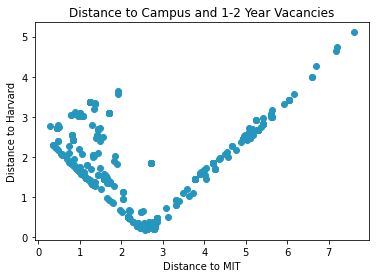

In [39]:
plt.scatter(openloc["mit_dist"],openloc["harv_dist"],c='#2596be')
plt.xlabel("Distance to MIT")
plt.ylabel("Distance to Harvard")
plt.title("Distance to Campus and 1-2 Year Vacancies")
plt.show()

In [8]:
openmin = []
openmin = np.append (openmin, (vdistances.loc[vdistances["Storefront Sales Status"]== "Open"]["min_dist"]))
closedmin=[]
closedmin=np.append (openmin, (vdistances.loc[vdistances["Storefront Sales Status"]== "Closed"]["min_dist"]))
openY=[]
closedY=[]

openY = np.ones((len(openmin),), dtype=int)
closedY = np.zeros((len(closedmin),),dtype=int)

closedminfinal=[]
for i in range(len(closedmin)):
    if closedmin[i]<5:
        closedminfinal.append(closedmin[i])
openminfinal=[]
for i in range(len(openmin)):
    if openmin[i]<5:
        openminfinal.append(openmin[i])


In [10]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=closedminfinal, marker_color=primary_colors[0], name='Closed'))
fig.add_trace(go.Histogram(x=openminfinal, marker_color=primary_colors[1], name='Open'))

#Overlaid Histogram
fig.update_layout(title = "Comparison of Open and Closed by Minimum Distance to School", barmode='overlay')
fig.update_traces(opacity=0.7) # Reduce opacity to see both histograms
fig.show()

In [41]:
import plotly.express as px

fig = px.scatter(vdistances, x='Longitude', y='Latitude', color='Storefront Sales Status',
                 hover_data=['Storefront Sales Status'])
fig.show()

In [11]:
fig = go.Figure(data=[go.Scatter(
    x=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    y=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    mode='markers',
    marker=dict(
        color=primary_colors,
        size=[15, 30, 55, 70, 90, 110],
        showscale=True
        )
)])
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf414bac-1baa-463f-8d73-f1d9a87e25d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>